In [46]:
import numpy as np 
import pandas as pd 
import os 

# Import data

In [47]:
path_datamart = r'C:\Users\DDD\Google Drive\Coding\Python\Credit Risk Modeling in Python\Datamart'
inputs_train_csv = pd.read_csv(os.path.join(path_datamart, 'inputs_train.csv'), index_col=0)    #force the 1st column to be index 
targets_train_csv = pd.read_csv(os.path.join(path_datamart, 'targets_train.csv'), index_col=0)  
inputs_test_csv = pd.read_csv(os.path.join(path_datamart, 'inputs_test.csv'), index_col=0)
targets_test_csv = pd.read_csv(os.path.join(path_datamart, 'targets_test.csv'), index_col=0)

In [48]:
inputs_train_csv.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [49]:
inputs_train_csv.shape

(373028, 323)

In [50]:
targets_train_csv.shape

(373028, 1)

# Select features

In [51]:
# select only the columns (variables) that are dummy variables. Those small set of variables will be used to train the PD model
inputs_train_with_ref_cat = inputs_train_csv.loc[:, [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'delinq_2yrs:>=4',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'open_acc:0',
    'open_acc:1-3',
    'open_acc:4-12',
    'open_acc:13-17',
    'open_acc:18-22',
    'open_acc:23-25',
    'open_acc:26-30',
    'open_acc:>=31',
    'pub_rec:0-2',
    'pub_rec:3-4',
    'pub_rec:>=5',
    'total_acc:<=27',
    'total_acc:28-51',
    'total_acc:>=52',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'total_rev_hi_lim:<=5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-55K',
    'total_rev_hi_lim:55K-95K',
    'total_rev_hi_lim:>95K',
    'annual_inc:<20k',
    'annual_inc:20k-30k',
    'annual_inc:30k-40k',
    'annual_inc:40k-50k',
    'annual_inc:50k-60k',
    'annual_inc:60k-70k',
    'annual_inc:70k-80k',
    'annual_inc:80k-90k',
    'annual_inc:90k-100k',
    'annual_inc:100k-120k',
    'annual_inc:120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>56',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
    ]
]

In [52]:
# since each original variable is represented by (a bunch of its sub categorical dummy variables), that one original variable can be represented by 1 less sub categorical dummy variables.
# must remove 1 dummy variable for each original variables --> otherwise fall into dummy variable trap
# create a list that contains the reference variables that we are going to remove
ref_categories = [
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>84',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'delinq_2yrs:>=4',
    'inq_last_6mths:>6',
    'open_acc:0',
    'pub_rec:0-2',
    'total_acc:<=27',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<=5K',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:0-2'
]

In [53]:
# From the dataframe with simplified input variables, drop the variables with variable names in the reference categories list. 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD model

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression(solver='lbfgs', max_iter=1000)  #reg = logistic regression class
pd.options.display.max_rows = None # display all rows (default=60)

In [55]:
# fit training inputs with training targest
reg.fit(inputs_train, targets_train_csv.values.ravel())

KeyboardInterrupt: 

In [ ]:
reg.intercept_

array([-1.9009598])

In [ ]:
reg.coef_

array([[ 1.12140459,  0.8829422 ,  0.68885393,  0.50090299,  0.32548798,
         0.13739144,  0.09198754,  0.10731762,  0.03751695,  0.05976728,
         0.0606216 ,  0.06299115,  0.0792182 ,  0.13690893,  0.10127758,
         0.18564197,  0.24152009,  0.22504891,  0.26362899,  0.32200784,
         0.52349329,  0.08801613, -0.0108598 ,  0.30510182,  0.20174357,
         0.21470002,  0.26729188,  0.05390176,  0.0790932 ,  0.10033014,
         0.12518007,  0.09055801,  0.06081559,  0.12434633,  1.06902924,
         0.86906013,  0.76866465,  0.56772687,  0.4064349 ,  0.16136628,
        -0.07355458,  0.88212148,  0.55540175,  0.30361512,  0.11135596,
         0.04829933,  0.02885966,  0.06926553,  0.10978333,  0.10499931,
         0.09335003,  0.05081033,  0.67451427,  0.53073962,  0.32136895,
         0.49968283,  0.40321877,  0.37696281,  0.36041726,  0.35877837,
         0.3875504 ,  0.30073882,  0.12565246,  0.16250331, -0.01930084,
         0.02776625,  0.20643427,  0.04319364,  0.0

In [ ]:
feature_name = inputs_train.columns.values  #get name of all features, variables

In [ ]:
#create a df that store all feature names, along with its coefficient values
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficients
0,grade:A,1.121405
1,grade:B,0.882942
2,grade:C,0.688854
3,grade:D,0.500903
4,grade:E,0.325488
5,grade:F,0.137391
6,home_ownership:OWN,0.091988
7,home_ownership:MORTGAGE,0.107318
8,addr_state:NM_VA,0.037517
9,addr_state:NY,0.059767


In [ ]:
#add intercept values to the top of the summary table df
summary_table.index = summary_table.index + 1   #add 1 to the index of the summary table
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] #set intercept value as location 0 of the summary table df. The newly added row, index 0, would be at the bottom of the df
summary_table = summary_table.sort_index()      #sort the index from smallest to largest. Then assigned it back as the summary table
summary_table


,Feature name,Coefficients
0,Intercept,-1.900960
1,grade:A,1.121405
2,grade:B,0.882942
3,grade:C,0.688854
4,grade:D,0.500903
5,grade:E,0.325488
6,grade:F,0.137391
7,home_ownership:OWN,0.091988
8,home_ownership:MORTGAGE,0.107318
9,addr_state:NM_VA,0.037517


## Logistic Regression with multivariate p-values

In [ ]:
# have to check for each feature, whether they significantly contribute to the explanatory of the dependent variable (good_bad in this case). 
# P-values do this job for us. P-values < 0.05 is statistically significant. 
# NOTE: impact of all features on the outcome is collective rather than independent --> p-values have to be compute based on multivariate models --> sklearn compute p-values based on univariate model, i.e., treating each feature as if there is no other features --> have to adjust the fit function of the Logistic Regression model by creating a new class.


In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_multivariate_pvalues:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)   #inherete everything from the regression class

    # create new fit function, override fit() in the original class
    def fit(self, X, y):
        self.model.fit(X, y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg2 = LogisticRegression_multivariate_pvalues(solver='lbfgs', max_iter=1000)
reg2.fit(inputs_train, targets_train_csv.values.ravel())

In [ ]:
#use the same code as above to create summary table
summary_table2 = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table2['Coefficients'] = np.transpose(reg2.coef_)
summary_table2.index = summary_table2.index + 1   #add 1 to the index of the summary table
summary_table2.loc[0] = ['Intercept', reg2.intercept_[0]] #set intercept value as location 0 of the summary table df. The newly added row, index 0, would be at the bottom of the df
summary_table2 = summary_table2.sort_index()      #sort the index from smallest to largest. Then assigned it back as the summary table

In [ ]:
#p-values can be retrieved from the reg2 model. Add a nan value to the top of the p-values list so that it would be corresponding to the summary table that we have built above
p_values = np.append(
    np.nan, 
    np.array(reg2.p_values)
)
summary_table2['p_values'] = p_values
summary_table2
# NOTE: each original independent variable is represented by several dummy variables. If all dummies under the same original variable is statistically significant --> the original variable should be retained. Vice versa, if all dummies under the same original variable is not statistically significant --> the original variable should be removed. In between the 2 extreme cases, it is conservative to retain original variables if only 1 of its dummies is statistically siginificant. 
# using rule above, delinq_2yrs, pub_rec, total_acc, total_rev_hi_lim are not significant

,Feature name,Coefficients,p_values
0,Intercept,-1.900960,NaN
1,grade:A,1.121405,6.070888e-35
2,grade:B,0.882942,3.079499e-47
3,grade:C,0.688854,5.842093e-34
4,grade:D,0.500903,1.356741e-20
5,grade:E,0.325488,1.351408e-11
6,grade:F,0.137391,6.175013e-03
7,home_ownership:OWN,0.091988,5.186695e-06
8,home_ownership:MORTGAGE,0.107318,2.966572e-17
9,addr_state:NM_VA,0.037517,2.420214e-01


### Select features 2

In [ ]:
# revise the selected features and their reference categories. Remove delinq_2yrs, open_acc, pub_rec, total_acc, total_rev_hi_lim since they are not significant
inputs_train_with_ref_cat2 = inputs_train_csv.loc[:, [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20k',
    'annual_inc:20k-30k',
    'annual_inc:30k-40k',
    'annual_inc:40k-50k',
    'annual_inc:50k-60k',
    'annual_inc:60k-70k',
    'annual_inc:70k-80k',
    'annual_inc:80k-90k',
    'annual_inc:90k-100k',
    'annual_inc:100k-120k',
    'annual_inc:120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>56',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
    ]
]
ref_categories2 = [
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>84',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:0-2'
]

In [ ]:
# new input train data set
inputs_train2 = inputs_train_with_ref_cat2.drop(ref_categories2, axis = 1)

In [ ]:
#override reg2 and also create summary table
reg2 = LogisticRegression_multivariate_pvalues(solver='lbfgs', max_iter=1000)
reg2.fit(inputs_train2, targets_train_csv.values.ravel())
feature_name2 = inputs_train2.columns.values
summary_table2 = pd.DataFrame(columns=['Feature name'], data=feature_name2)
summary_table2['Coefficients'] = np.transpose(reg2.coef_)
summary_table2.index = summary_table2.index + 1   #add 1 to the index of the summary table
summary_table2.loc[0] = ['Intercept', reg2.intercept_[0]] #set intercept value as location 0 of the summary table df. The newly added row, index 0, would be at the bottom of the df
summary_table2 = summary_table2.sort_index()      #sort the index from smallest to largest. Then assigned it back as the summary table
p_values = np.append(
    np.nan, 
    np.array(reg2.p_values)
)
summary_table2['p_values'] = p_values
summary_table2

,Feature name,Coefficients,p_values
0,Intercept,-1.418809,NaN
1,grade:A,1.120328,5.653670e-35
2,grade:B,0.879963,3.153738e-47
3,grade:C,0.686308,4.598326e-34
4,grade:D,0.498920,9.137948e-21
5,grade:E,0.324291,6.601925e-12
6,grade:F,0.136295,5.480394e-03
7,home_ownership:OWN,0.094128,2.995973e-06
8,home_ownership:MORTGAGE,0.106594,3.569486e-17
9,addr_state:NM_VA,0.037834,2.374615e-01


In [ ]:
# higher coefficient in the dummy variable means higher probability of being good
# coeff of grade B = 0.883869 --> odd of being good, given grade B is e^0.883869 times odds of being being good, given grade G. Or 2.42 times. This is because grade G is omitted, and being in the reference category list. 
# like wise, can compute odd of being good, given grade B is 1.4671 times odds of being being good, given grade D

In [ ]:
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.
import pickle
pickle.dump(reg2, open('pd_model.sav', 'wb'))


# PD model validation

## Out of sample validation = Test data set validation

In [ ]:
# use the selected feature above for the test data set
inputs_test_with_ref_cat = inputs_test_csv.loc[:, [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:oth__med__vacation',
    'purpose:major_purch__car__home_impr',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<38',
    'mths_since_issue_d:38-39',
    'mths_since_issue_d:40-41',
    'mths_since_issue_d:42-48',
    'mths_since_issue_d:49-52',
    'mths_since_issue_d:53-64',
    'mths_since_issue_d:65-84',
    'mths_since_issue_d:>84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:141-164',
    'mths_since_earliest_cr_line:165-247',
    'mths_since_earliest_cr_line:248-270',
    'mths_since_earliest_cr_line:271-352',
    'mths_since_earliest_cr_line:>352',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20k',
    'annual_inc:20k-30k',
    'annual_inc:30k-40k',
    'annual_inc:40k-50k',
    'annual_inc:50k-60k',
    'annual_inc:60k-70k',
    'annual_inc:70k-80k',
    'annual_inc:80k-90k',
    'annual_inc:90k-100k',
    'annual_inc:100k-120k',
    'annual_inc:120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>56',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
    ]
]
ref_categories = [
    'grade:G',
    'home_ownership:Rent_Other_None_Any',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>84',
    'int_rate:>20.281',
    'mths_since_earliest_cr_line:<140',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3',
    'mths_since_last_record:0-2'
]

In [ ]:
# remove the reference category from the input test data set
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()
#NOTE: should have 84 variables as we have for training

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# use reg2 model above to predit good_bad for the input test data set
y_hat_test = reg2.model.predict(inputs_test)
# for each row, multiply variable coefficient with the variable's value --> yield the log of odds of non-default = log of odds of being good borrower
# then exponential (e^) the log of odds to --> yield the odds
# a cut-off point is set to determined whether each row is default or non-default
# the function above set the cut-off to 50% --> i.e. if the obtained probability is less than 0.5 then y_hat_test = 0 else = 1 
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# however, we would like to obtain the probability of good, of non-default instead
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# the result is returned as: for each observation, [prob of default, prob of non-default]
y_hat_test_proba

array([[0.07589784, 0.92410216],
       [0.15140046, 0.84859954],
       [0.11418037, 0.88581963],
       ...,
       [0.02675813, 0.97324187],
       [0.04024737, 0.95975263],
       [0.04763664, 0.95236336]])

In [ ]:
# for probability of non-default, to take the 2nd row of each observation
y_hat_test_proba = y_hat_test_proba[:][:,1] #select all array, then for each array select the 2nd element
y_hat_test_proba

array([0.92410216, 0.84859954, 0.88581963, ..., 0.97324187, 0.95975263,
       0.95236336])

In [ ]:
#combine the actual good bad from the target test, with the predicted probability
targets_test_csv_temp = targets_test_csv    #take a copy of the target test data
targets_test_csv_temp.reset_index(drop=True, inplace=True)
df_actual_predictedProb = pd.concat([targets_test_csv_temp, pd.DataFrame(y_hat_test_proba)], axis=1)    #create the combined dataframe
df_actual_predictedProb.columns = ['loan_data_targets_test', 'y_hat_test_proba']    #rename columns
df_actual_predictedProb.index = inputs_test.index  #set index of the combined df the same as the index of input test df, which is the same as the target set df
df_actual_predictedProb.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924102
288564,1,0.848600
213591,1,0.885820
263083,1,0.940971
165001,1,0.968471


## Accuracy and Area Under the Curve

In [ ]:
#set threshold value
tr = 0.9

df_actual_predictedProb['y_hat_test'] = np.where(df_actual_predictedProb['y_hat_test_proba'] > tr, 1, 0)    #compute y_hat based on its probability of non-default and threashold value

### confusion matrix

In [ ]:
# shows matrix of True Positive, True Negative, False Positive, False Negative
pd.crosstab(
    df_actual_predictedProb['loan_data_targets_test'],
    df_actual_predictedProb['y_hat_test'],
    rownames=['Actual'],
    colnames=['Predicted']
    )

Predicted,0,1
Actual,,
0,7377,2813
1,35795,47272


In [ ]:
# compute accuracy of the model = number of correctly predicted value / total number of observation 
# = (actual 0 & predicted 0 / total obs) + (actual 1 & predicted 1 / total obs) 
# = sum of the diagonal of the matrix below
crosstab_prcnt = pd.crosstab(
    df_actual_predictedProb['loan_data_targets_test'],
    df_actual_predictedProb['y_hat_test'],
    rownames=['Actual'],
    colnames=['Predicted']
    )/df_actual_predictedProb.shape[0]
crosstab_prcnt

Predicted,0,1
Actual,,
0,0.079104,0.030164
1,0.383832,0.506900


In [ ]:
crosstab_prcnt.iloc[0,0] + crosstab_prcnt.iloc[1,1]     #sum of the diagonal of the matrix
#NOTE: despite high accuracy, the threshold of 0.5 generates a lot of false positive.
#NOTE: setting high threshold, e.g. 0.9, reduces number of approved but defaults (actual 0 & predicted 1). However, also reduce number of approved application (actual 1 & predicted 1)
#NOTE: the rate of true classification (good being classified as good, bad being classified as bad) is much more important than the overall accuracy of the model

0.5860042677761454

### ROC curve

In [ ]:
# ROC curve = Receiving Observing Characteristic curve = plot the rate of true positive against the false positive, for all possible thresholds. 
# each point in the ROC curve represent a confusion matrix at the specific threshold
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(
    df_actual_predictedProb['loan_data_targets_test'],
    df_actual_predictedProb['y_hat_test_proba']
)       #roc_curve() output 3 arrays: false positive rate, true positive rate, threshold --> we assign them to 3 variables

In [ ]:
# often show true positive rate as function of false positive rate --> true positive rate in the y-axis, false positive rate in the x-axis
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

Text(0.5, 1.0, 'ROC curve')

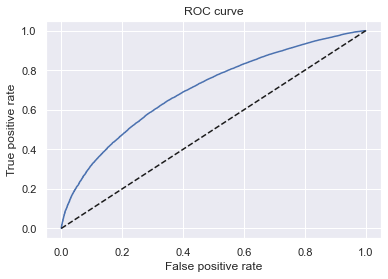

In [ ]:
plt.plot(fpr, tpr)   # plotting the ROC curve: false positive rate along the x-axis and the true positive rate along the y-axis,
plt.plot(fpr, fpr, linestyle = '--', color = 'k')   # seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')   # name the x-axis "False positive rate".
plt.ylabel('True positive rate')    # name the x-axis "True positive rate".
plt.title('ROC curve')  # name the graph "ROC curve".

#### AUC = area under the curve

In [72]:
# AUC = area under the bell curve of the model. 
# the diagonal = minimum line, meaning if our bell curve is exactly 45 degree as that diagonal, the model just predict by chance, as much as 50-50 coin toss. AUC of hte diagonal line = 50%
#NOTE: 
# AUC between 50% - 60% = bad
# AUC between 60% - 70% = poor
# AUC between 70% - 80% = fair
# AUC between 80% - 90% = good
# AUC between 90% - 1000% = excellend
AUROC = roc_auc_score(
    df_actual_predictedProb['loan_data_targets_test'],
    df_actual_predictedProb['y_hat_test_proba']
)   #compute AUC of our model
AUROC
#NOTE: AUC of 100% does not mean the model is good. It depends on whether the data & feature have intuitive explanatory to the outcome or not.
# usually, multiple models are built to compete for the one solution. 

0.702185798963635

## Gini and Smirnov

In [ ]:
df_actual_predictedProb = df_actual_predictedProb.sort_values('y_hat_test_proba')   #sort ascending by estimated probability of default
df_actual_predictedProb.reset_index(inplace=True)   #reset index, without dropping the old index
df_actual_predictedProb.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.365989,0
1,42344,1,0.384088,0
2,39810,0,0.387767,0
3,40518,0,0.443534,0
4,42396,0,0.453282,0


In [59]:
#total cumulative number of population; cumulative number of good; cumulative number of bad
df_actual_predictedProb['Cumulative Number population'] = df_actual_predictedProb.index + 1
df_actual_predictedProb['Cumulative Number good'] = df_actual_predictedProb['loan_data_targets_test'].cumsum()
df_actual_predictedProb['Cumulative Number bad'] = df_actual_predictedProb['Cumulative Number population'] - df_actual_predictedProb['Cumulative Number good']
df_actual_predictedProb.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative Number population,Cumulative Number good,Cumulative Number bad
0,42341,1,0.365989,0,1,1,0
1,42344,1,0.384088,0,2,2,0
2,39810,0,0.387767,0,3,2,1
3,40518,0,0.443534,0,4,2,2
4,42396,0,0.453282,0,5,2,3


In [65]:
#cumulative % of total population; cumulative % of good; cumulative % of good_bad
df_actual_predictedProb['Cumulative Prcnt population'] = df_actual_predictedProb['Cumulative Number population']/ (df_actual_predictedProb.shape[0])
df_actual_predictedProb['Cumulative Prcnt good'] = df_actual_predictedProb['Cumulative Number good']/ (df_actual_predictedProb['loan_data_targets_test'].sum())
df_actual_predictedProb['Cumulative Prcnt bad'] = df_actual_predictedProb['Cumulative Number bad']/ (
    df_actual_predictedProb.shape[0] - df_actual_predictedProb['loan_data_targets_test'].sum()
    )
df_actual_predictedProb.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative Number population,Cumulative Number good,Cumulative Number bad,Cumulative Prcnt population,Cumulative Prcnt good,Cumulative Prcnt bad
93252,262480,1,0.991259,1,93253,83063,10190,0.999957,0.999952,1.0
93253,231463,1,0.991327,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991689,1,93255,83065,10190,0.999979,0.999976,1.0
93255,261086,1,0.992088,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992682,1,93257,83067,10190,1.000000,1.000000,1.0


### GINI

In [ ]:
# plot cumulative proportion of default (bad borrowers) in y-axis against cummulative proportion of all borrowers in x-axis
# borrower must be in ascending order by estimated probabilty of good from the PD model
# GINI coefficient = percentage of area above the secondary diagonal line, that close the area on the top left of the diagonal line --> the greater the area, the better the model

Text(0.5, 1.0, 'Gini')

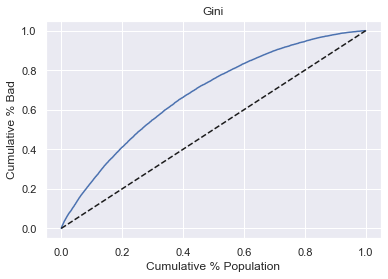

In [69]:
# plot cumulative proportion of default (bad borrowers) in y-axis against cummulative proportion of all borrowers in x-axis
plt.plot(
    df_actual_predictedProb['Cumulative Prcnt population'], 
    df_actual_predictedProb['Cumulative Prcnt bad']
    )
plt.plot( 
    df_actual_predictedProb['Cumulative Prcnt population'], 
    df_actual_predictedProb['Cumulative Prcnt population'],
    linestyle='--', 
    color='k'
    )
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [73]:
# GINI is relatively similar to AUC above --> GINI = AUROC * 2 - 1 or AUROC = (GINI + 1)/2
GINI = AUROC * 2 - 1
GINI
#NOTE: There are other statistical method in python to compute GINI

0.40437159792726995

### Smirnov:

In [74]:
# seperate actual good from actual bad borrowers. 
# Look at [cumulative distribution of actual good borrowers and actual bad borrowers] vs [model's estimated probability of good borrowers]
# Kolmogorov-Smirnov coefficient = KS coefficient = max difference between cumulative distribution function of good and bad borrowers, with respect to predicted probability --> the greater the difference --> the greater the KS coefficient --> the better the model --> perfect model would have KS=1, random model would have KS=0

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

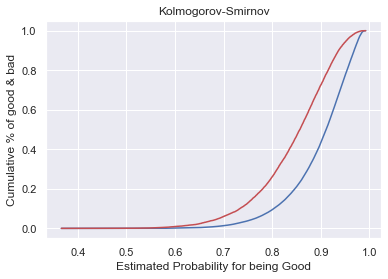

In [76]:
plt.plot(
    df_actual_predictedProb['y_hat_test_proba'], 
    df_actual_predictedProb['Cumulative Prcnt good'],
    color = 'b'
    )   # plot cumulative % of good in y-axis against estimated probability of good borrowers in x-axis
plt.plot(
    df_actual_predictedProb['y_hat_test_proba'], 
    df_actual_predictedProb['Cumulative Prcnt bad'],
    color = 'r'
    )   # plot cumulative % of bad in y-axis against estimated probability of good borrowers in x-axis
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative % of good & bad')
plt.title('Kolmogorov-Smirnov')

In [78]:
KS = max(df_actual_predictedProb['Cumulative Prcnt bad'] - df_actual_predictedProb['Cumulative Prcnt good'])  # compute KS coefficient from dataframe
KS
#NOTE: KS is not close to 0, but significantly higher than 0. Aso the graph indicates that 2 cumulative distributions are sufficiently far away from each other --> model has satisfactory predictive power. 

0.296909979840221